In [41]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [42]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [43]:
data = pd.read_csv('../data/master.csv')
data.shape

(15214, 33)

In [44]:
def extract_date(data):
    date, _ = data.split(' ')
    return date

In [45]:
data['date'] = data['timestamp'].apply(lambda x : extract_date(x))
data['date'] =  pd.to_datetime(data['date'])

In [46]:
select_cols = ['date', 'Case-Id']
data = data[select_cols]

In [47]:
df  = data.groupby('date').agg(['count'])
df = df.reset_index()
df.head()

,date,Case-Id
,,count
0,2013-11-07,9
1,2013-11-08,1
2,2013-11-09,15
3,2013-11-11,11
4,2013-11-12,11


In [48]:
df.to_csv('../data/forcast.csv', index=False)

In [49]:
df.columns = ['ds', 'y']
start_date = '2014-01-01'
end_date =  '2015-03-01'
mask = (df['ds'] > start_date) & (df['ds'] <= end_date)
df = df.loc[mask]

In [50]:
df.head()

,ds,y
54,2014-01-02,30
55,2014-01-03,10
56,2014-01-04,45
57,2014-01-05,26
58,2014-01-06,44


In [51]:
from fbprophet import Prophet

In [52]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


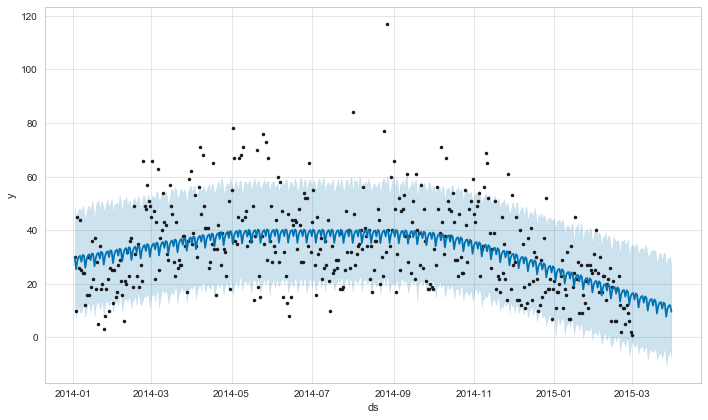

In [53]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast);

In [54]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = '7 days')
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = '7 days')

INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 19.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 21.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 24.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 19.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 21.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 24.0.
